<h1>CI HW3<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Q1" data-toc-modified-id="Q1-1">Q1</a></span><ul class="toc-item"><li><span><a href="#First-5-Steps-and-Path-to-Target" data-toc-modified-id="First-5-Steps-and-Path-to-Target-1.1">First 5 Steps and Path to Target</a></span></li><li><span><a href="#Add-Barriers" data-toc-modified-id="Add-Barriers-1.2">Add Barriers</a></span></li></ul></li><li><span><a href="#Q2" data-toc-modified-id="Q2-2">Q2</a></span><ul class="toc-item"><li><span><a href="#Objective-Function-Plot" data-toc-modified-id="Objective-Function-Plot-2.1">Objective Function Plot</a></span></li><li><span><a href="#Simulated-Annealing" data-toc-modified-id="Simulated-Annealing-2.2">Simulated Annealing</a></span><ul class="toc-item"><li><span><a href="#Parameter-selection" data-toc-modified-id="Parameter-selection-2.2.1">Parameter selection</a></span></li><li><span><a href="#Final-outcomes" data-toc-modified-id="Final-outcomes-2.2.2">Final outcomes</a></span></li><li><span><a href="#First-5-Iterations" data-toc-modified-id="First-5-Iterations-2.2.3">First 5 Iterations</a></span></li></ul></li><li><span><a href="#Tabu-Search" data-toc-modified-id="Tabu-Search-2.3">Tabu Search</a></span><ul class="toc-item"><li><span><a href="#Parameter-selection" data-toc-modified-id="Parameter-selection-2.3.1">Parameter selection</a></span></li><li><span><a href="#Final-outcomes" data-toc-modified-id="Final-outcomes-2.3.2">Final outcomes</a></span></li><li><span><a href="#First-5-Iterations" data-toc-modified-id="First-5-Iterations-2.3.3">First 5 Iterations</a></span></li></ul></li></ul></li></ul></div>

## Q1

### First 5 Steps and Path to Target

Following the lecture contents, basically each time the green dot will move to the next step after evaluating the surrounding feasible points. The surrounding feasible points (*not on the barrier, not going back to previous position, not going outside of the boundary*) that result in the shortest Euclidean distance to the target red dot will be chosen and the process is iteratively conducted until the red dot is reached. 

Below is a function and calculates and plots of the first 7 iterations while the green dot is moving along the `black` path (with stars indicating the nodes on the shortest path) and finally reached to the red dot. The `yellow` stars are the nodes being evaluated at each iteration. The `red` star is the chosen next step from the evaluations. The rest should be self-explained. 

Iteration= 1 , after evaluations (yellow dots), move to point= [2, 3]


<IPython.core.display.Javascript object>


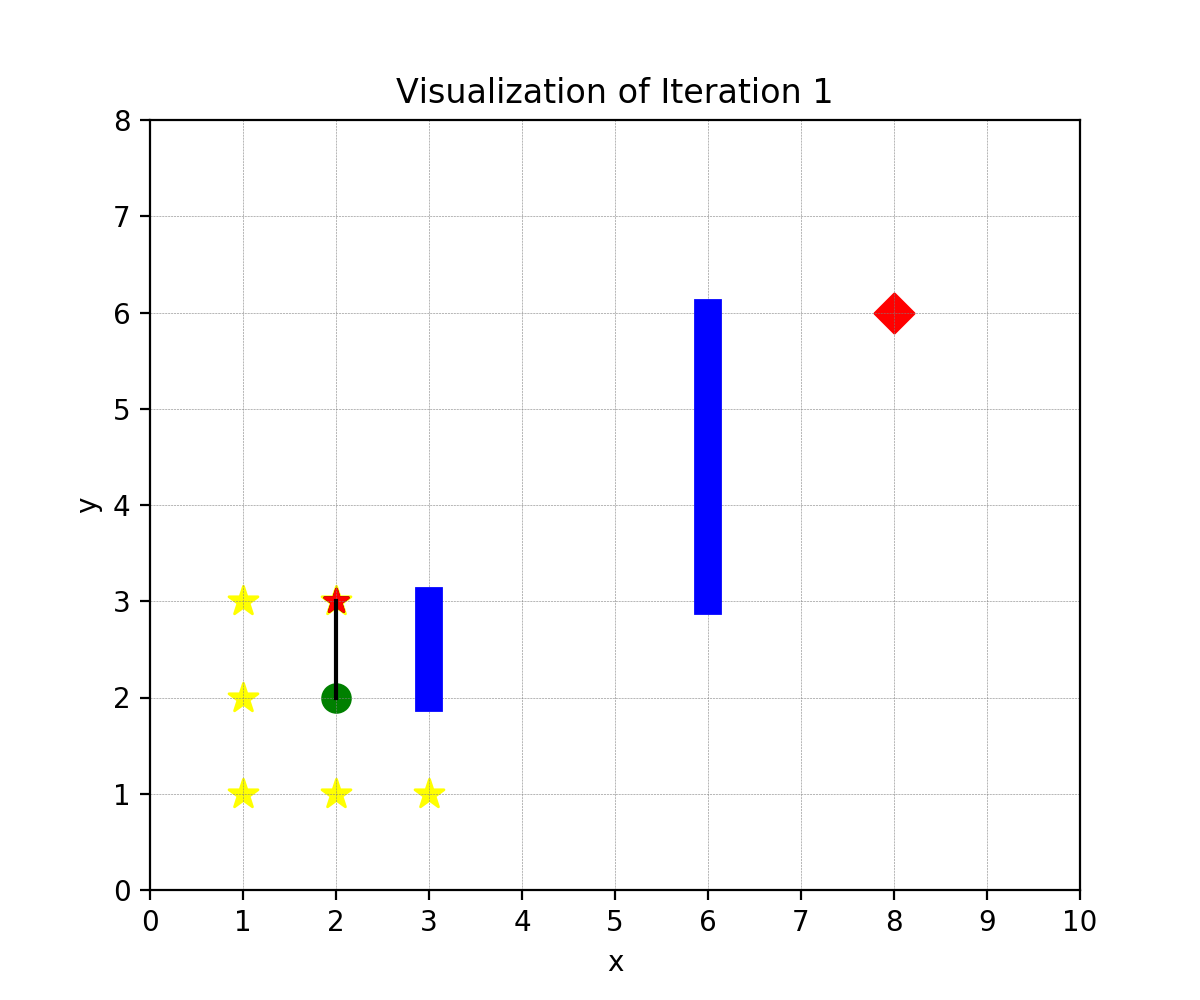

Iteration= 2 , after evaluations (yellow dots), move to point= [3, 4]


<IPython.core.display.Javascript object>


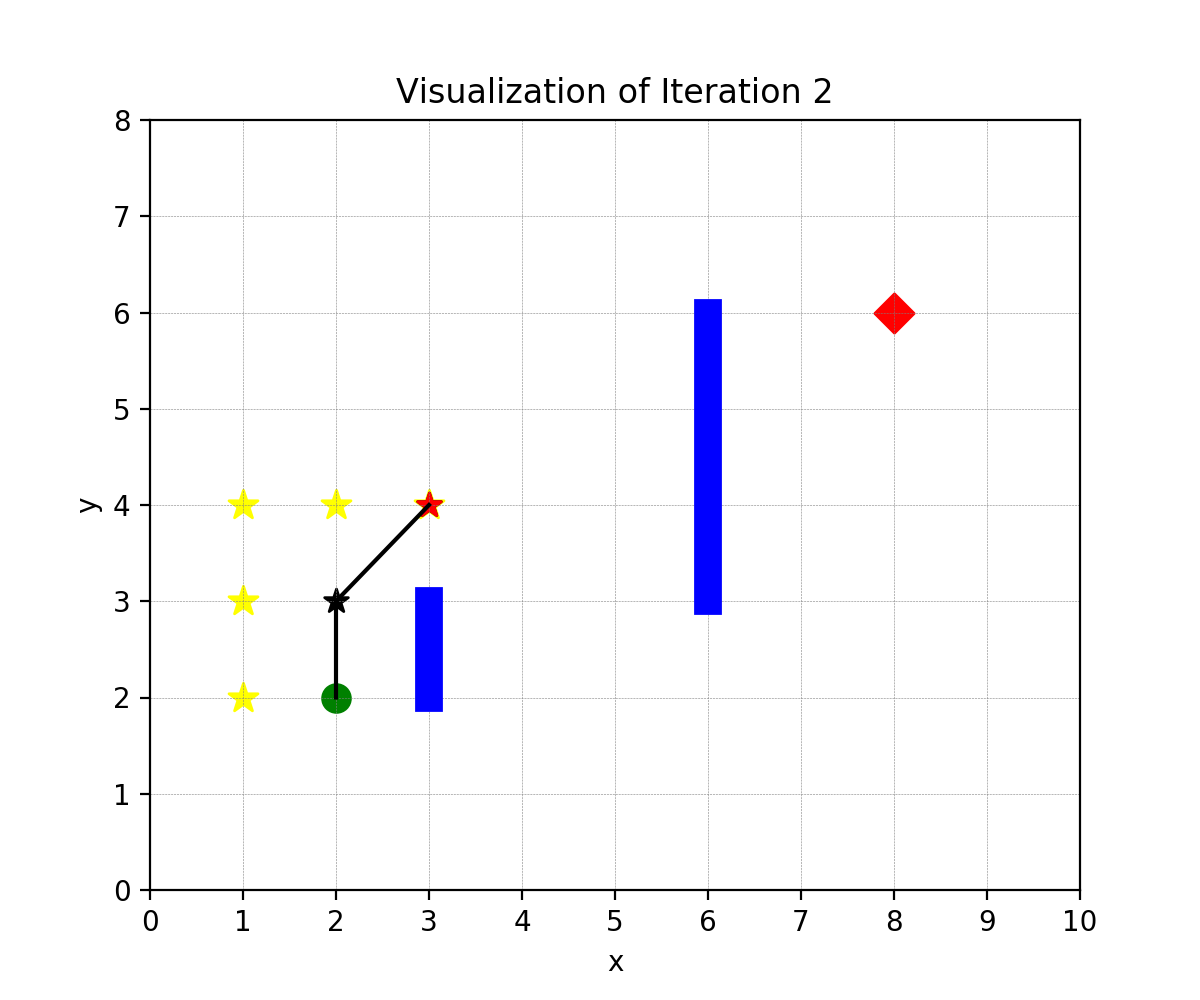

Iteration= 3 , after evaluations (yellow dots), move to point= [4, 5]


<IPython.core.display.Javascript object>


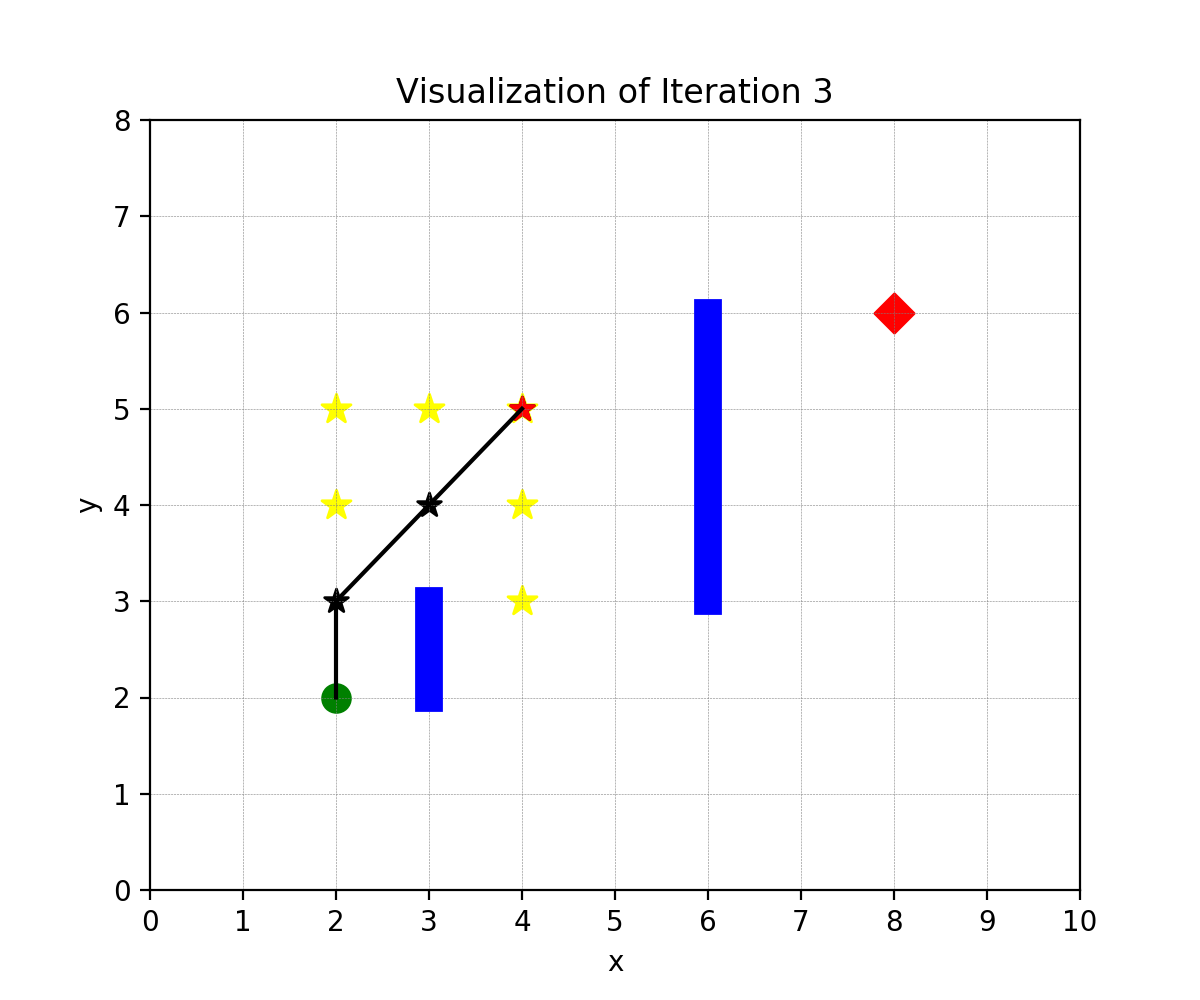

Iteration= 4 , after evaluations (yellow dots), move to point= [5, 6]


<IPython.core.display.Javascript object>


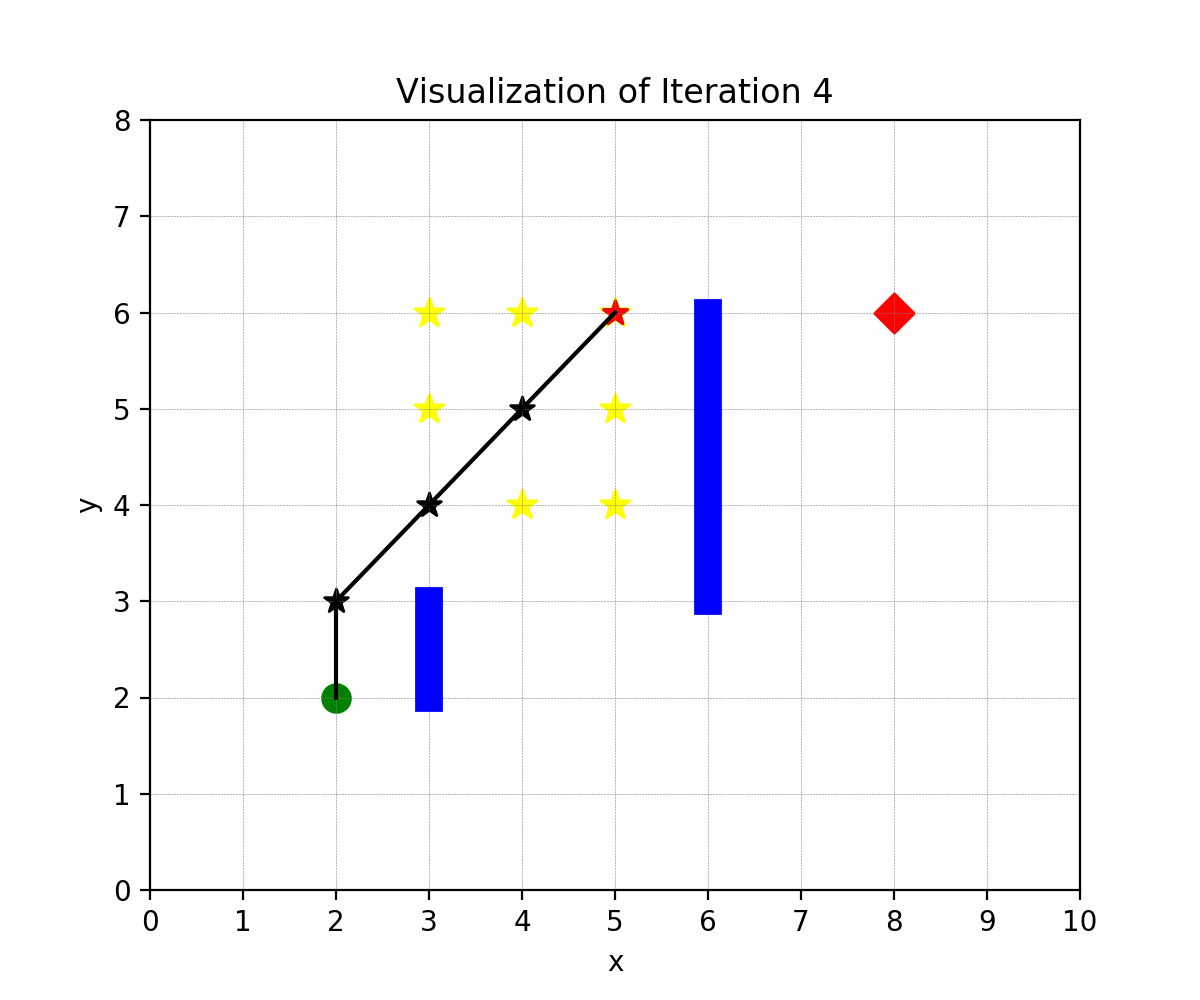

Iteration= 5 , after evaluations (yellow dots), move to point= [6, 7]


<IPython.core.display.Javascript object>


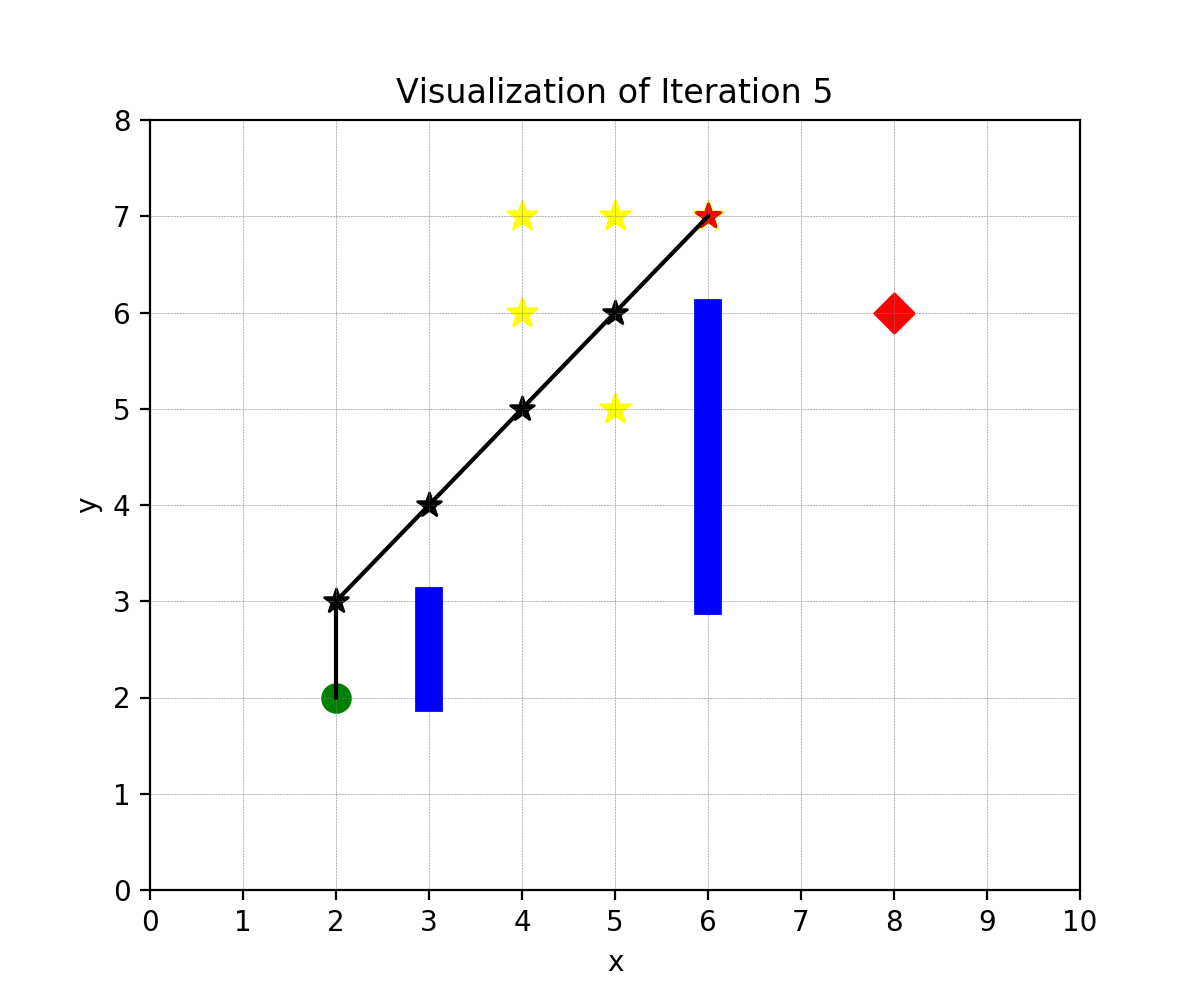

Iteration= 6 , after evaluations (yellow dots), move to point= [7, 6]


<IPython.core.display.Javascript object>


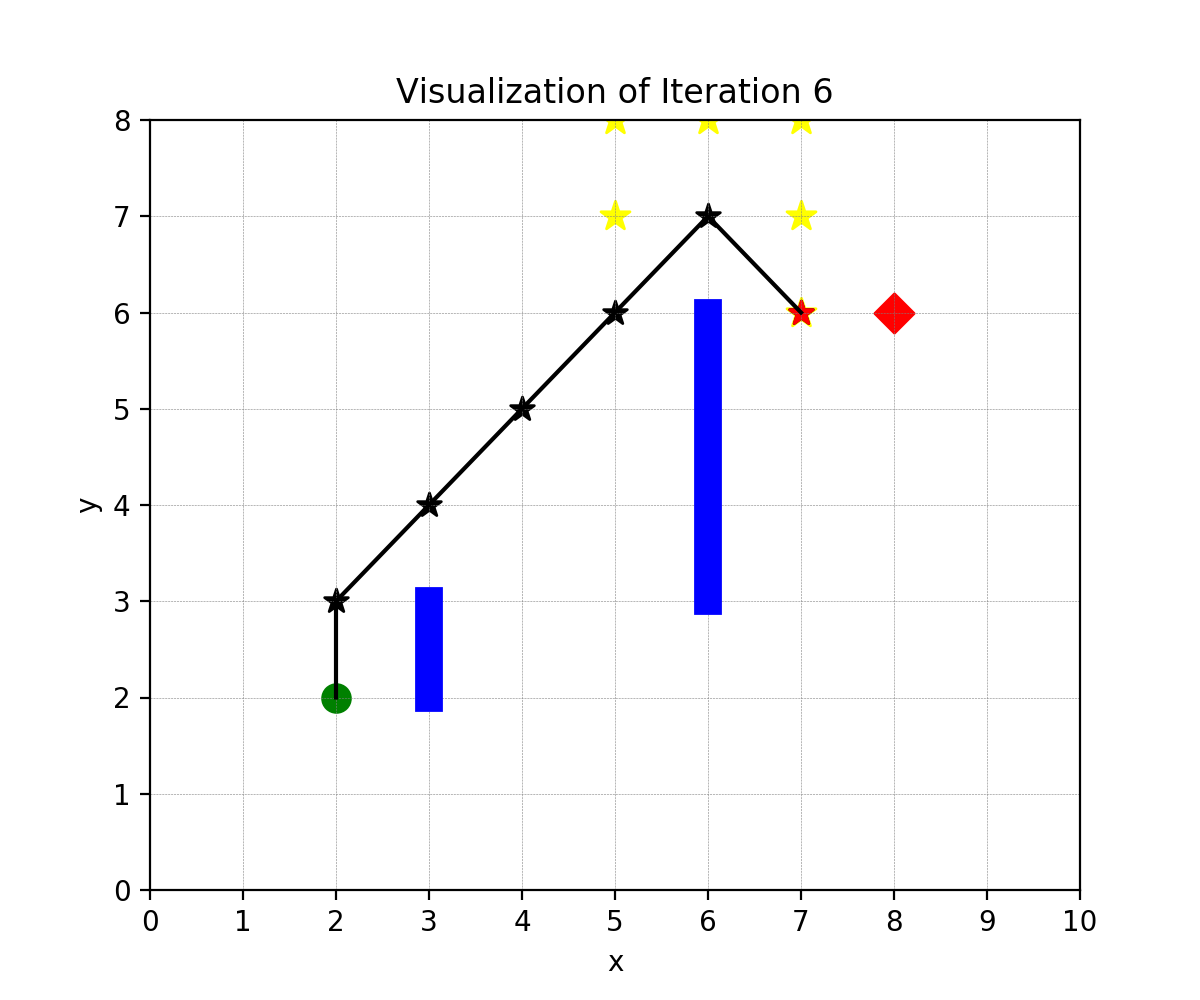

Iteration= 7 , after evaluations (yellow dots), move to point= [8, 6]


<IPython.core.display.Javascript object>


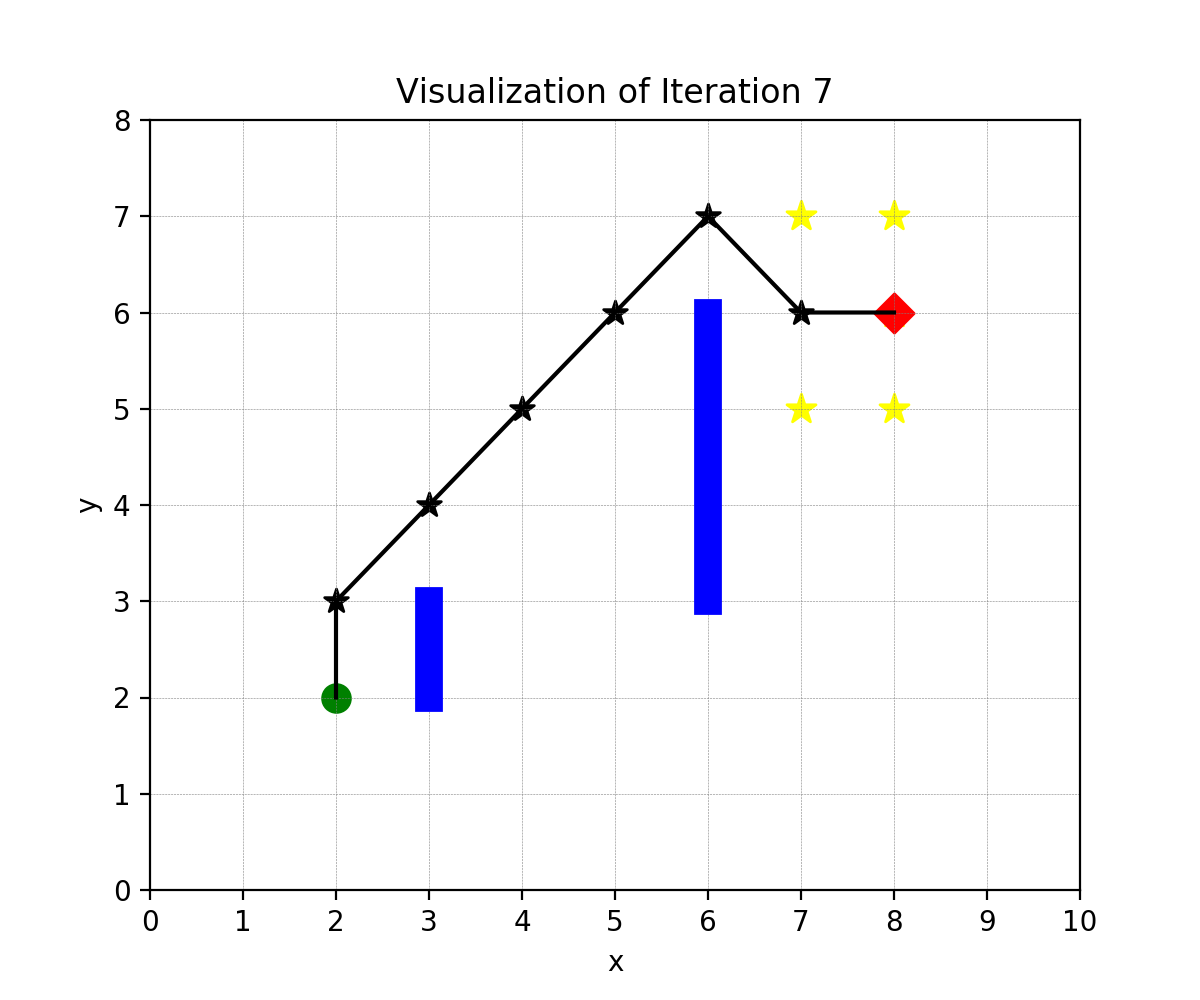

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# %% Q1 - question 1 and 2
# Set the lower left hand corner as (0,0). Then the start point is (2,2) and end point is (8,6).
start = [2, 2]  # start point
target = [8, 6]  # end point
barrier = np.array([[3, 3, 6, 6, 6, 6],  # x
                    [2, 3, 3, 4, 5, 6]])  # y

barrier_list = []
for i in range(barrier.shape[1]):  # convert barrier coordinates to list
    barrier_list.append([barrier[0][i], barrier[1][i]])
    
def shortest_path(count_max=100, plot=0, barrier_list=barrier_list, print_yes=1):
    """count_max is max number of iterations. Since the picture is 9*11, the max is 99. \n
    barrier_list stores the barriers point.\n
    """
    begin = [start[0], start[1]]  # initialize begin point
    past = [begin]  # list to store the past points that have gone through
    count = 0  # initialize the count
    while begin != target and count != count_max:

        x = begin[0]  # store the x coordinate
        y = begin[1]  # store the x coordinate
        surround_points = [[x + 1, y - 1], [x + 1, y], [x + 1, y + 1],
                           [x, y - 1], [x, y + 1],
                           [x - 1, y - 1], [x - 1, y], [x - 1, y + 1]]

        # remove surrounding point that are unfeasible
        removal = []  # initialize the list to store the surround points to be removed
        for i in range(8):  # 8 surrouding points in total; remove unfeasible directions and going to past points
            if surround_points[i][0] < 0 or surround_points[i][0] > 10 \
                    or surround_points[i][1] < 0 or surround_points[i][1] > 8:  # if out of bound, store them
                removal.append(surround_points[i])
            if surround_points[i] in barrier_list:  # remove the barrier points
                removal.append(surround_points[i])
            if surround_points[i] in past:  # remove past path points
                removal.append(surround_points[i])

        surround_points = [ele for ele in surround_points if ele not in removal]  # surround points to be evaluated

        # calculate distance from surrounding points to target
        sum_sq = []  # store sum of square distance for each feasible solution to target
        for i in range(len(surround_points)):
            sum_sq.append((surround_points[i][0] - target[0]) ** 2 + (surround_points[i][1] - target[1]) ** 2)

        min_index = sum_sq.index(min(sum_sq))  # return the index of the min

        begin = surround_points[min_index]  # The new point is now the begin point
        past.append(begin)  # add the next point to past
        count += 1
        if print_yes:  # if print_yes=1, then print out this msg to console
            print("Iteration=", count, ", after evaluations (yellow dots), move to point=", begin)

        if plot:
            past_np = np.asarray(past).T  # convert list to numpy and transpose
            surround_np = np.asarray(surround_points).T
            barrier = np.asarray(barrier_list).T
            plt.figure(figsize=(6, 5))
            plt.scatter(x=barrier[0], y=barrier[1], c='b', marker="s")  # dots for barriers
            plt.plot(barrier[0, :2], barrier[1, 0:2], c='b', linewidth=10)  # 冒号都是含左不含右
            plt.plot(barrier[0, 2:6], barrier[1, 2:6], c='b', linewidth=10)  # connect barriers line up
            if len(barrier[0]) > 6:
                plt.scatter(x=barrier[0, 6:], y=barrier[1, 6:], c='b', marker="s", s=100)
            plt.plot(past_np[0], past_np[1], c='black')  # plot lines between path points
            plt.scatter(x=surround_np[0], y=surround_np[1], c='yellow', marker="*", s=120)  # mark candidate points
            plt.scatter(x=past_np[0, 1:], y=past_np[1, 1:], c='black', marker="*", s=80)  # mark *'s for path points
            plt.scatter(x=past_np[0, -1], y=past_np[1, -1], c='r', marker="*", s=80)  # mark *'s for path points
            plt.scatter(x=start[0], y=start[1], c='g', marker="o", s=100)  # mark start point; s is marker size
            plt.scatter(x=target[0], y=target[1], c='r', marker="D", s=100)  # mark target point
            plt.title('Visualization of Iteration ' + str(count))
            plt.axis([0, 10, 0, 8])
            plt.xlabel('x')
            plt.ylabel('y')
            plt.xticks(np.arange(0, 11, 1))  # 0 to 10
            plt.yticks(np.arange(0, 9, 1))  # 0 to 8
            plt.grid(color='gray', linestyle='--', linewidth=.2)
            plt.show()
    return count

count = shortest_path(count_max=11, plot=1)

### Add Barriers

For the 3rd question, the barrier points are added manually as below. In total of `23` barrier points were added to ensure the A* algorithm has evaluated all nodes except for the nodes on the barrier. The 23 barrier points are listed in the below code and also shown as `blue` blocks on the picture. 

The green dot takes 35 steps and reached to the red dot. The 35 steps are shown as the `GIF` pictures below. The yellow stars shows the positions being evaluated at each step.

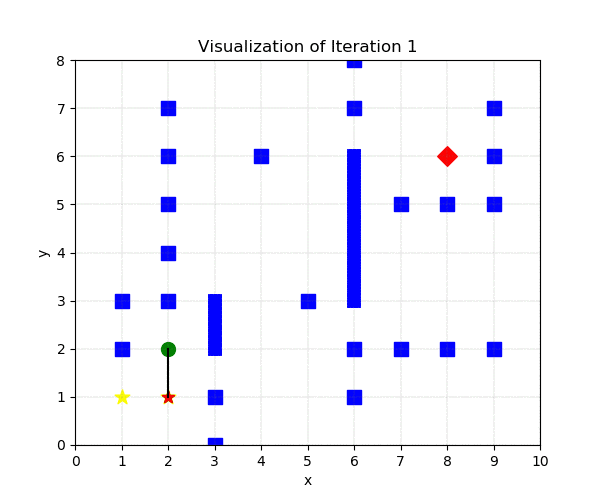

In [3]:
def add_barrier(add_barrier):
    new_barrier = barrier_list + add_barrier
    plt.close('all')
    count = shortest_path(count_max=100, plot=0, barrier_list=new_barrier, print_yes=0)

add_barrier([[2, 3],
             [3, 1],
             [1, 3],
             [3, 0],
             [1, 2],
             [2, 4],
             [2, 5],
             [2, 6],
             [2, 7],
             [6, 7],
             [6, 8],
             [4, 6],
             [5, 3],
             [6, 2],
             [6, 1],
             [7, 2],
             [8, 2],
             [9, 2],
             [7, 5],
             [8, 5],
             [9, 5],
             [9, 6],
             [9, 7]
             ])

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display

from pathlib import Path
gifPath = Path("C:/Users/Administrator/Dropbox/Misc/INES 8090 Computational Intelligence/HW/HW3/gif/GIF.gif")
# Display GIF in Jupyter, CoLab, IPython
with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='png')

## Q2

### Objective Function Plot

The objective function is plotted as below with $-1\le x_1\le 1$ and $-1\le x_2\le 1$.

<IPython.core.display.Javascript object>


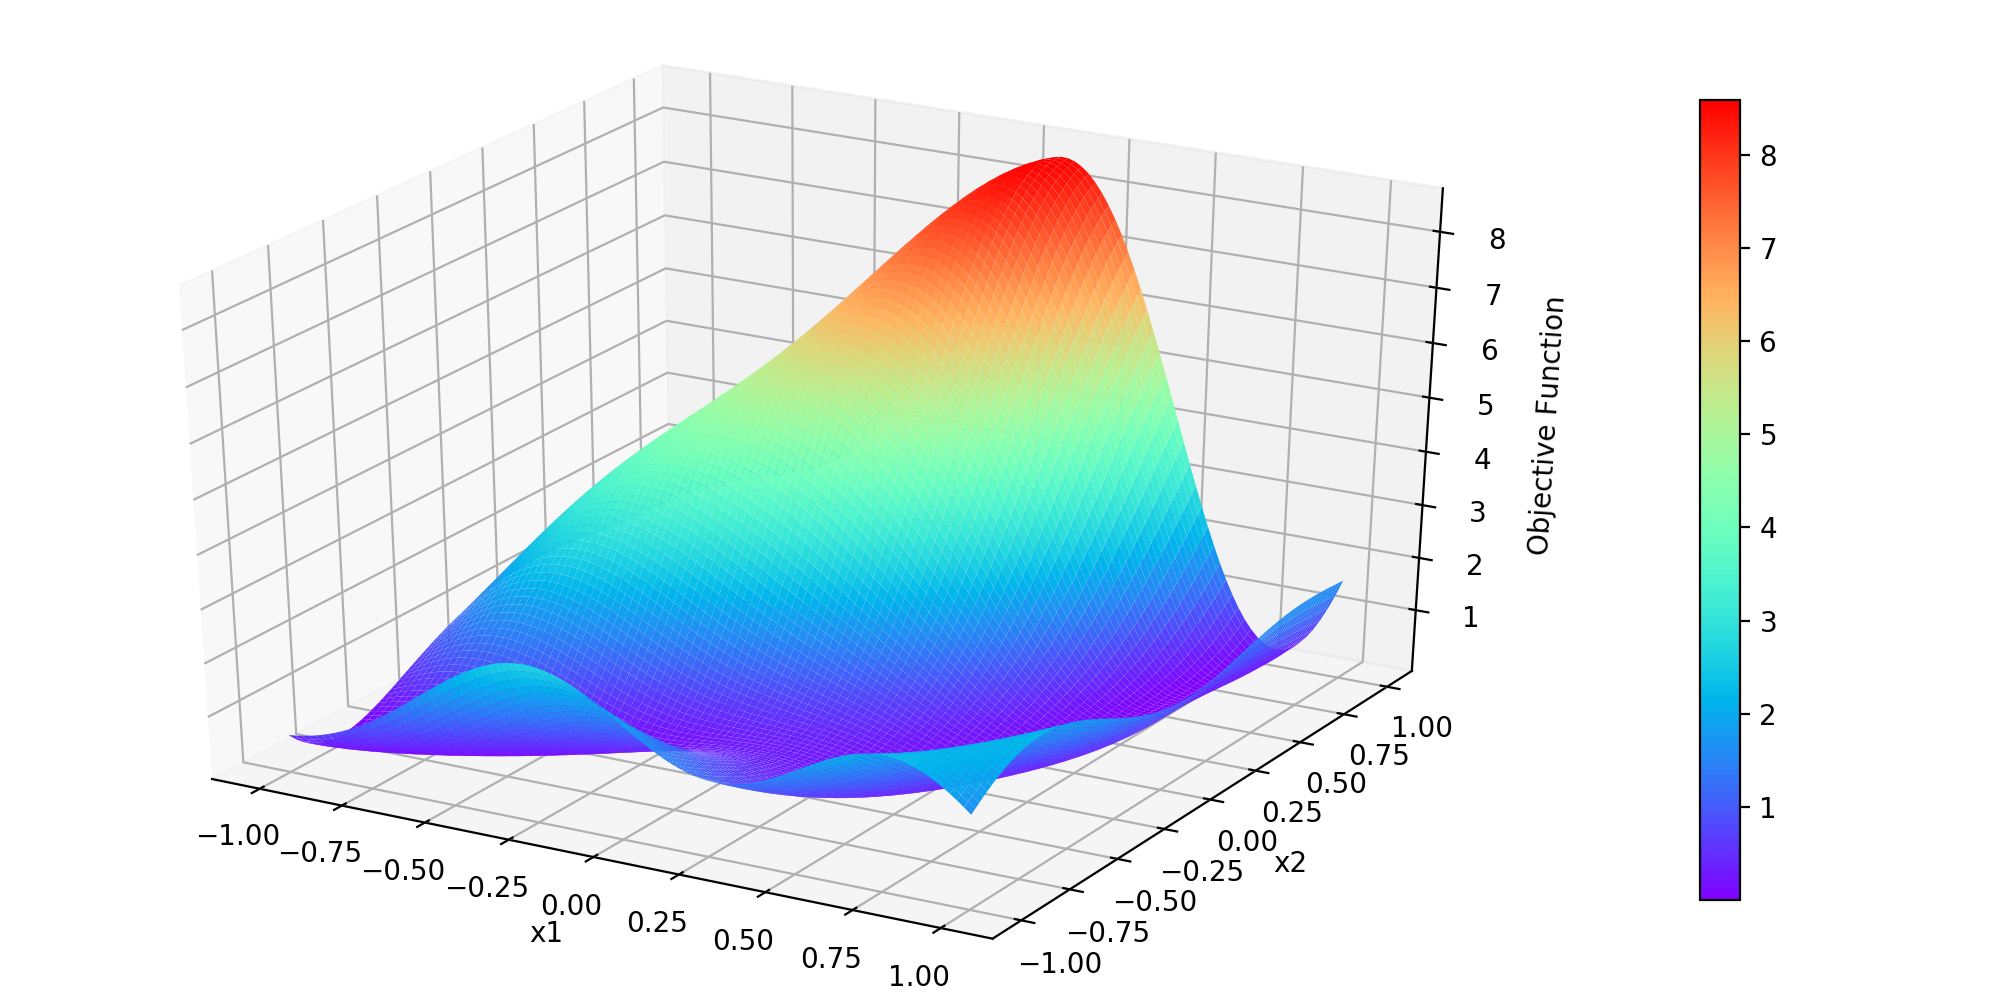

In [1]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def obj(X1, X2):  # define objective function
    f = (X1 - np.sin(2 * X1 + X2) - np.cos(3 * X1 - X2)) ** 2 + \
        (X2 - np.sin(3 * X1 - 2 * X2) + np.cos(X1 + X2)) ** 2
    return f


fig = plt.figure(figsize=(10, 5))
ax = Axes3D(fig)
x1 = np.linspace(-1, 1, num=100)
x2 = np.linspace(-1, 1, num=100)
X1, X2 = np.meshgrid(x1, x2)  # establish the grid

# fig.scatter(x1,x2,f)
surf = ax.plot_surface(X1, X2, obj(X1, X2), rstride=1,
                       cstride=1, cmap='rainbow')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Objective Function')
# ax.set_xticks(np.arange(-1, 1, step=0.5))
# ax.set_yticks(np.arange(-1, 1, step=0.5))
fig.colorbar(surf, shrink=0.8, aspect=20)
plt.show()

### Simulated Annealing

The simulated annealing function is developed as below and the basic idea is when the new solution is better than the old solution, then move to the new solution; if the new solution is worse than the old solution, there's a chance that we still move to the new solution. The acceptance probability is determined by T(temperature), the value difference (between new and old solution) and the threshold. **When the iteration grows, the value T increases (with the increase speed controled by learning rate) to allow for the probability of moving to a worse new solution become smaller during the later iterations.**

Also, **the neighborhood points for x1 and x2 are defined as the whole search space of combination of x1 and x2 to enable more thorough search in the search space throughout the iterations.** One can always define a smaller neighborhood region to get a faster convergence time, with the risk of sinking into local optimum. 

#### Parameter selection

There are several parameters to be tuned in this algorithm:
* Initial temperature: T
* Learning rate: lr
* Threshold
* Random seed ID

The grid search method is applied search for the optimal combination of the parameters which result in the minimum function value as well as the fastest convergence. 
* T is starting from 0.1 and stop at 1 with a stepsize=0.1. 
* lr is starting from 1.0001 and stop at 1.0001 with a stepsize=10^(-4)
* The threshold has been manually tried out (10^12 in this case) to fasten the convergence. 
* The random seed ID has been tried out from 101 to 120. 

<IPython.core.display.Javascript object>


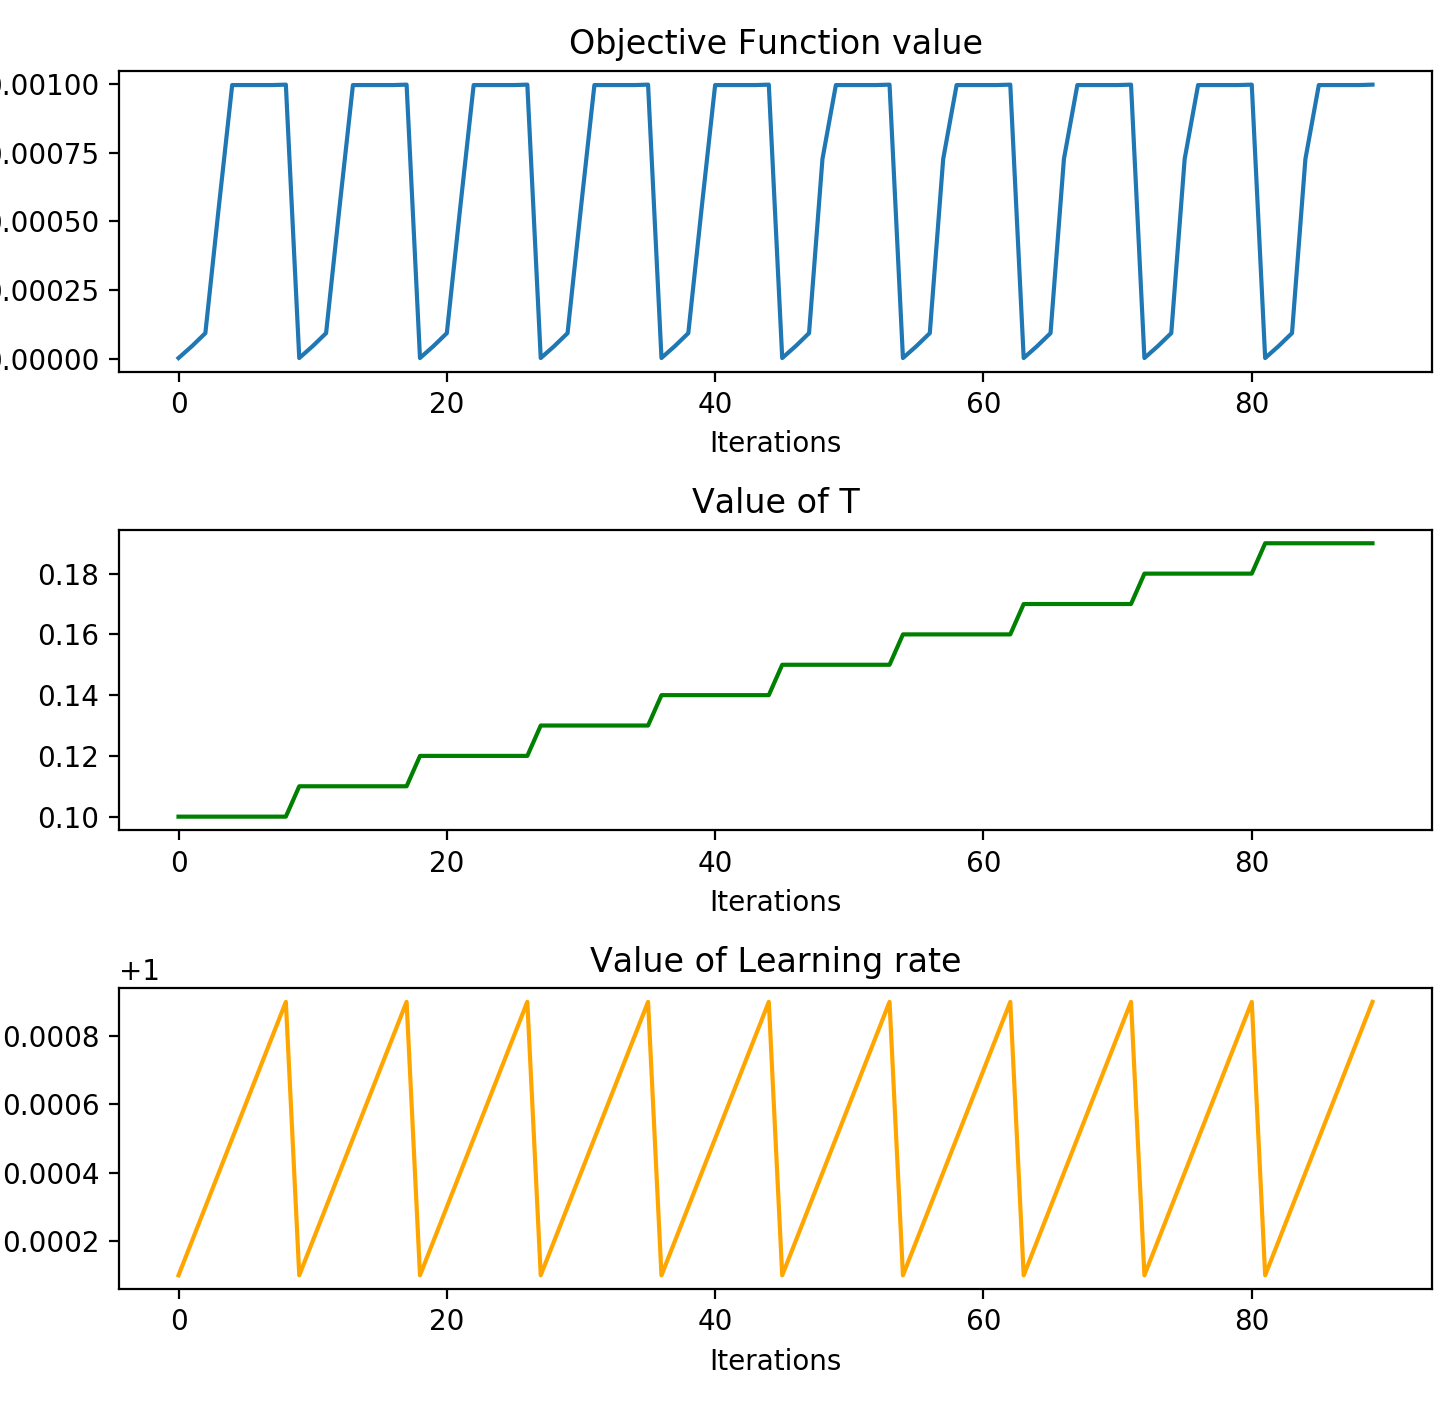

The minimum objective function value from the experiments is: 1.771131670114133e-06


In [2]:
import random

def simu_anneal(T, lr, Tmax, threshold, plot, print_yes, seed=101):
    """T - initial temperature; lr - Learning rate. \n
    if probability>threshold, a point will be jumping to the next."""
    random.seed(seed)
    x1 = 0  # initialize x1
    x2 = 0  # initialize x2
    obj_value = [obj(x1, x2)]  # store the training results after each iteration
    x1_value = [x1]  # store the x1 values throughout the iterations
    x2_value = [x2]  # store the x2 values throughout the iterations
    while T < Tmax:
        y_old = obj(x1, x2)  # old objective function value
        X1 = random.uniform(-1, 1)  # new X1
        X2 = random.uniform(-1, 1)  # new X2
        y_new = obj(X1, X2)  # new objective function value

        if y_new <= y_old:  # when new<=old, always move
            x1 = X1
            x2 = X2
        else:  # when new>old, still a chance to move to new point
            if np.exp((y_new - y_old) / T) > threshold:
                x1 = X1
                x2 = X2
        obj_value.append(y_old)
        x1_value.append(x1)
        x2_value.append(x2)
        T *= lr
    if print_yes:
        print("obj=", obj(x1, x2), "x1=", x1, "x2=", x2)

    if plot:
        plt.close()
        plt.figure(figsize=(10, 5))
        plt.subplot(2, 1, 1)
        plt.plot(obj_value)
        plt.yticks(np.arange(0, 9, 1))  # 0 to 8
        plt.title('Objective Function value')
        plt.xlabel('Iterations')

        plt.subplot(2, 1, 2)
        plt.plot(x1_value)
        plt.plot(x2_value)
        plt.legend(['x1', 'x2'])
        plt.title('x1 and x2 values')
        plt.xlabel('Iterations')
        plt.show()
        plt.tight_layout()
    return obj_value, x1_value, x2_value, x1, x2


min_obj_store = []  # list to store the min obj values from each combination of parameters
T_store = []  # list to store T
lr_store = []  # list to store lr
threshold_store = []  # list to store threshold
for T in np.arange(start=0.1, stop=0.2, step=0.01):
    for lr in np.arange(start=1 + 10 ** (-4), stop=1 + 10 ** (-3), step=10 ** (-4)):
        T_store.append(T)
        lr_store.append(lr)
        obj_value, *_ = simu_anneal(T=T, lr=lr, Tmax=10 ** 3, threshold=10 ** 12, plot=0, print_yes=0)
        min_obj = min(obj_value)
        min_obj_store.append(min_obj)

plt.close('all')
plt.figure(figsize=(10, 7))
plt.subplot(3, 1, 1)
plt.plot(min_obj_store)
plt.xlabel('Iterations')
plt.title('Objective Function value')
plt.subplot(3, 1, 2)
plt.plot(T_store, c='g')
plt.xlabel('Iterations')
plt.title('Value of T')
plt.subplot(3, 1, 3)
plt.plot(lr_store, c='orange')
plt.xlabel('Iterations')
plt.title('Value of Learning rate')
plt.tight_layout()
print("The minimum objective function value from the experiments is:", min(min_obj_store))

From the plot above, we can tell the learning rate (in cycles) affects the final objective function value to go up and down and the the best learning rate=`1.0001` while changing the value of T (the initial temperature) won't affect the objective function value in this case. 



Then the different random seed numbers have been tested out. Different random seed id causes drastically different results after running with over 80000 iterations. We can tell the random seed=`101` gives the smallest objective function value. 

For seed id=114, 118 and 120, the result is worse than the other results. The assumption is that more iterations should be tried out in order to get a better result. Some further experiments have been conducted in the "Tabu Search" section, in which when more iterations were tried out, the outcomes from these seed ids were closer to the other seeds. 

In [39]:
# select the random seed id
for i in range(101, 121, 1):
    print('seed=', i, ':')
    obj_value, *_ = simu_anneal(T=0.1, lr=1 + 10 ** (-4), Tmax=10 **
                                3, threshold=10 ** 12, plot=0, print_yes=1, seed=i)

seed= 101 :
obj= 1.771131670114133e-06 x1= 0.7634063502726243 x2= 0.674561250916206
seed= 102 :
obj= 1.657268190391731e-05 x1= 0.7641954942586666 x2= 0.6764156035762359
seed= 103 :
obj= 3.0909613002489276e-05 x1= 0.7644538496245195 x2= 0.6764247639010073
seed= 104 :
obj= 5.681980965134704e-05 x1= 0.7652202809607145 x2= 0.6827084625638093
seed= 105 :
obj= 5.60203747335978e-05 x1= 0.7623170066197242 x2= 0.6668976197530374
seed= 106 :
obj= 7.258450313273465e-05 x1= 0.7635429951741521 x2= 0.6827769686012264
seed= 107 :
obj= 7.296183312662851e-06 x1= 0.7630977093513396 x2= 0.676522331186904
seed= 108 :
obj= 8.699795966520293e-06 x1= 0.7638902721394627 x2= 0.6756026417151102
seed= 109 :
obj= 4.1754765298223976e-05 x1= 0.7645443849324138 x2= 0.6759716314055115
seed= 110 :
obj= 2.1364406120854618e-05 x1= 0.7623045961675168 x2= 0.6732874277372436
seed= 111 :
obj= 7.3547920702061065e-06 x1= 0.7627008839438434 x2= 0.6735652180977749
seed= 112 :
obj= 8.165151517403155e-05 x1= 0.7656106322015965 x2

The chosen T and lr are used to locate the minimum function value as below. We can tell from the picture that the objective function value rarely change after 10000 iterations and the algorithm converges (x1 and x2 are stabalized) after around 23000 iterations. 

obj= 1.771131670114133e-06 x1= 0.7634063502726243 x2= 0.674561250916206


<IPython.core.display.Javascript object>


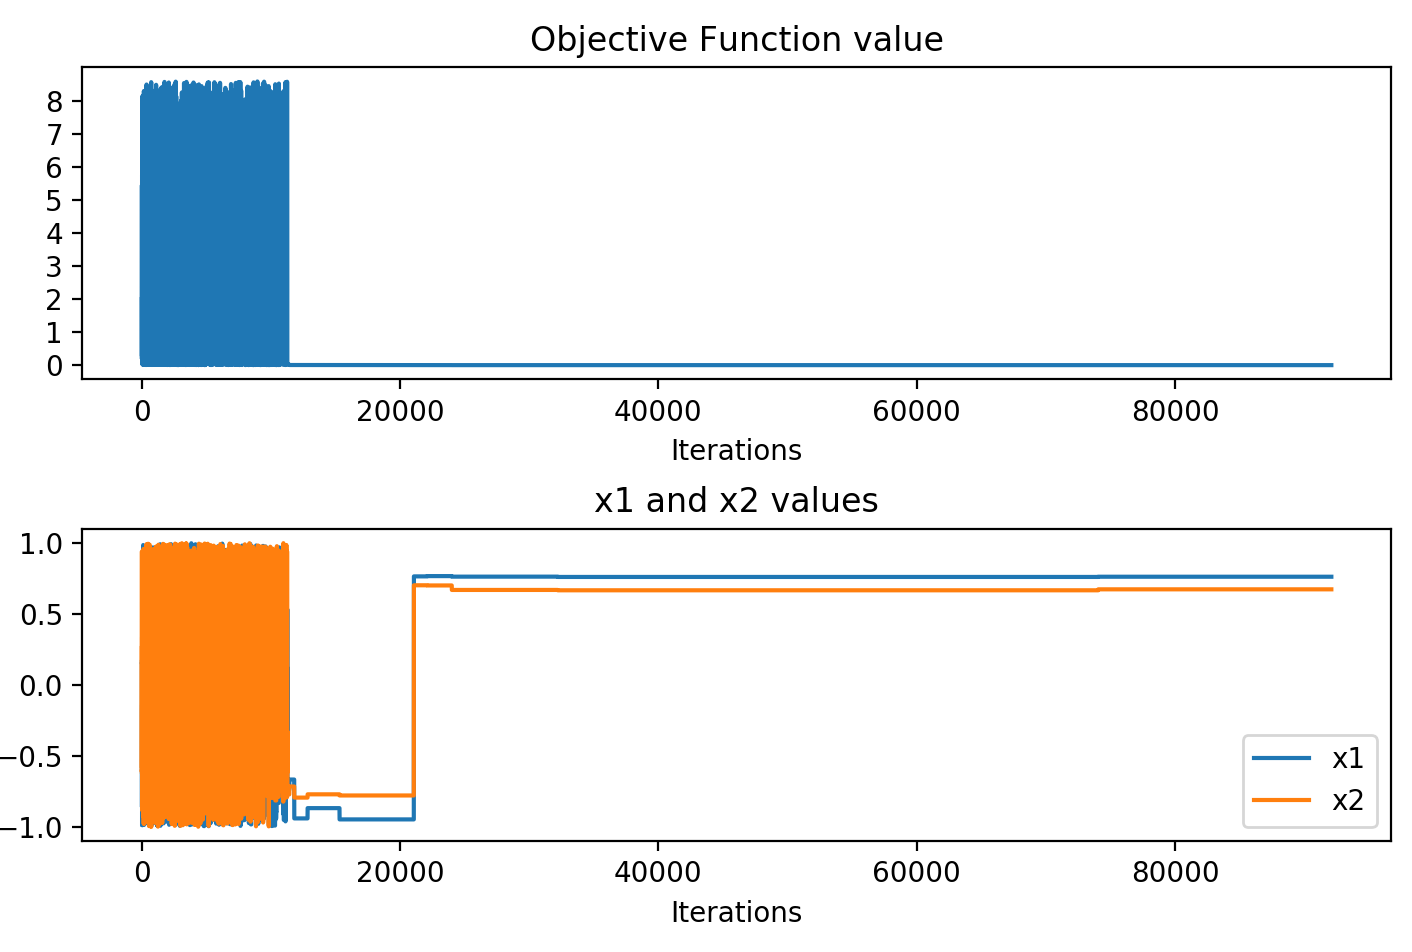

In [3]:
obj_value, x1_value, x2_value, x1_best, x2_best = simu_anneal(T=0.1, lr=1 + 10 ** (-4), Tmax=10 ** 3,
                                                              threshold=10 ** 12,
                                                              plot=1, print_yes=1, seed=101)

#### Final outcomes

With T=`0.1`, lr=`1.0001`, threshold=`10^12` and random seed id=`101`, The minimum objective function value is **1.771131670114133e-06**, with **x1=0.7634063502726243** and **x2=0.674561250916206**. 

The 9 neighborhood points around the solution are plotted as below. **The optimal point is located at the far lower right hand corner.**

<IPython.core.display.Javascript object>


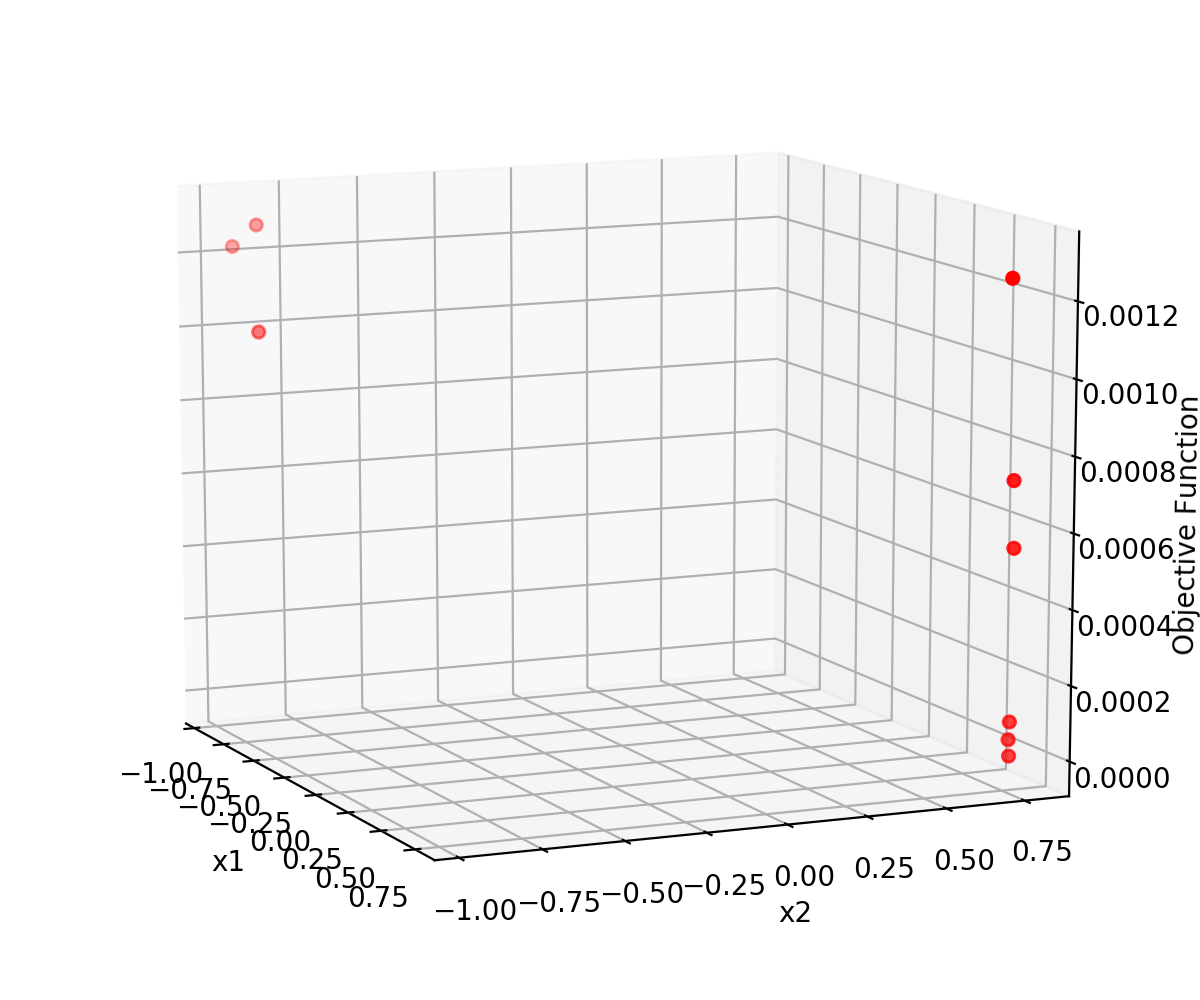

In [21]:
obj_value_nodup = list(dict.fromkeys(obj_value))  # remove duplicates in obj_value list
obj_value_nodup.sort()  # sort from smallest to largest
num_smallest = 10
min10_obj = obj_value_nodup[:num_smallest]  # take the 10 smallest objective function values

x1_store = []
x2_store = []

for i in range(num_smallest):
    index = obj_value.index(min10_obj[i])
    x1_store.append(x1_value[index]) # store the x1 corresponding to the 10 minimum obj values
    x2_store.append(x2_value[index]) # store the x2 corresponding to the 10 minimum obj values

from mpl_toolkits.mplot3d import Axes3D

plt.close('all')
fig = plt.figure(figsize=(6, 5))
ax = Axes3D(fig)
x1 = np.asarray(x1_store) # convert to numpy before plotting
x2 = np.asarray(x2_store)
surf = ax.scatter(x1, x1, obj(x1, x2), c='r', marker='o')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Objective Function')
plt.show()

#### First 5 Iterations

The first 5 iterations are illustrated in the picture below. Since the T starts from value of `0.1` which is relatively small, the solutions are always moving to the newer one for the first 5 iterations, even though some of the solutions (e.g., iteration 2 vs. iteration 4 vs. iteration 3) are actually getting worse. **Setting a small T initially allows the algorithm becomes brave to search around other areas instead of being pre-mature at local optima. As the value of T grows throughout the iterations, the algorithm will become more and more conservative to jump to a worse solution.**

obj= 2.2997406934845612 x1= -0.5752464632833378 x2= 0.9422119027075473


<IPython.core.display.Javascript object>


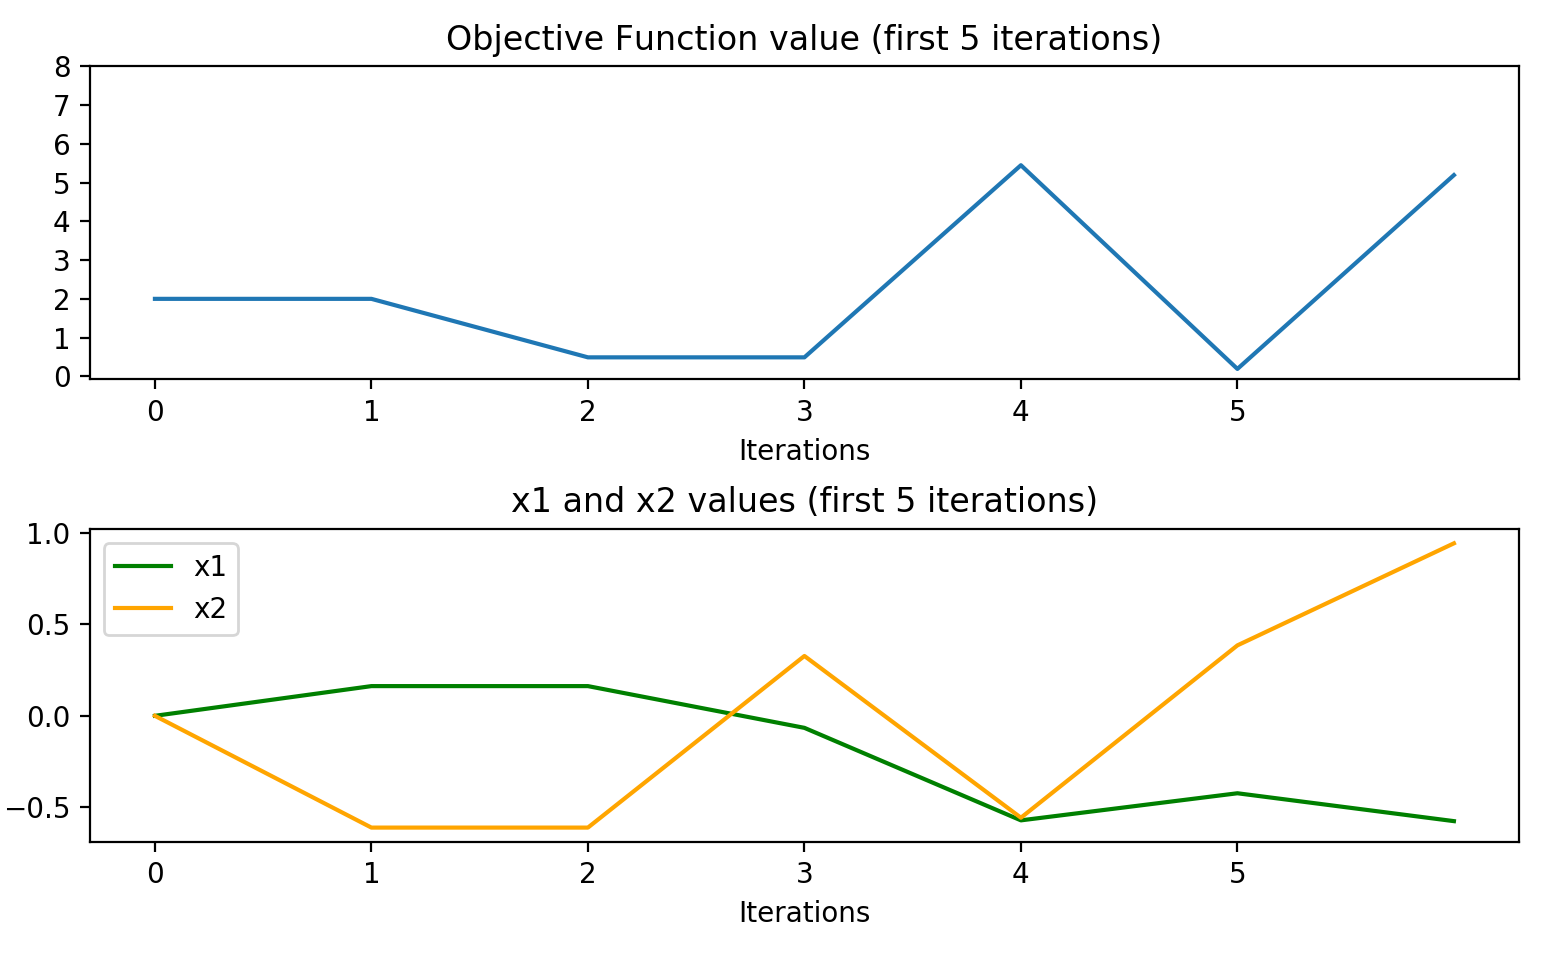

In [5]:
def simu_anneal_iterations(T, lr, maxit, threshold, plot, print_yes, seed=101):
    """T - initial temperature; lr - Learning rate. \n
    if probability>threshold, a point will be jumping to the next.\n
    maxit is used to control the iterations. """
    random.seed(seed)
    x1 = 0  # old x1
    x2 = 0  # old x2
    obj_value = [obj(x1, x2)]  # store the training results after each iteration
    x1_value = [x1]  # store the x1 values throughout the iterations
    x2_value = [x2]  # store the x2 values throughout the iterations
    for i in range(maxit+1):
        y_old = obj(x1, x2)  # old objective function value
        X1 = random.uniform(-1, 1)  # new X1
        X2 = random.uniform(-1, 1)  # new X2
        y_new = obj(X1, X2)  # new objective function value

        if y_new <= y_old:  # when new<=old, always move
            x1 = X1
            x2 = X2
        else:  # when new>old, still a chance to move to new point
            if np.exp((y_new - y_old) / T) > threshold:
                x1 = X1
                x2 = X2
        obj_value.append(y_old)
        x1_value.append(x1)
        x2_value.append(x2)
        T *= lr
    if print_yes:
        print("obj=", obj(x1, x2), "x1=", x1, "x2=", x2)

    if plot:
        plt.close()
        plt.figure(figsize=(10, 5))
        plt.subplot(2, 1, 1)
        plt.plot(obj_value)
        plt.xticks(np.arange(0, 6, 1))  # 0 to 5 iterations
        plt.yticks(np.arange(0, 9, 1))  # 0 to 8
        plt.title('Objective Function value (first 5 iterations)')
        plt.xlabel('Iterations')

        plt.subplot(2, 1, 2)
        plt.plot(x1_value, c='g')
        plt.plot(x2_value, c='orange')
        plt.legend(['x1', 'x2'])
        plt.xticks(np.arange(0, 6, 1))  # 0 to 5 iterations
        plt.title('x1 and x2 values (first 5 iterations)')
        plt.xlabel('Iterations')
        plt.show()
        plt.tight_layout()
    return min(obj_value), x1, x2

obj5, x1_5, x2_5 = simu_anneal_iterations(T=0.1, lr=1+10**(-4), maxit=5,
                       threshold=10**12, plot=1, print_yes=1, seed=101)

### Tabu Search

The tabu search function is developed as below and the basic idea is to store the nodes we have visited and avoid/or never going back to these nodes. In the code developed below, when generating for a new solution, the x1 and x2 will be compared to the tabu list and ensure we are not trying some combination of x1 and x2 that have been tried in the past iterations. Also, **the neighborhood points for x1 and x2 are defined as the whole search space of combination of x1 and x2 to enable more thorough search in the search space throughout the iterations.** One can always define a smaller neighborhood region to get a faster convergence time, with the risk of sinking into local optimum. 

Here only the short term memory is set up and the size of the short term tabu list is controlled by the tabu_size variable. **Multiple tabu list sizes have been tried out from 1000 to 50000 with a step size of 5000**.

One thing that is different from simulated annealing and need to be aware of is **the decimal point of x1 and x2 are limited 4 each**. This allows the tabu_list to be effective. If we don't limit the decimal points that x1 and x2 can have, the random generation process can come up with infinite combination of x1 and x2 and the tabu_list cannot regulate the training process effectively. 

Also I've noticed different random seed number could cause significant change to the final convergence result. **The random seed number from 101 to 120 have also been tested out.**

In [7]:
from collections import deque  # create double ended quenes


def tabu_search(tabu_size, maxit=10, decimal=4, print_yes=0, plot=0, seed=101):
    """tabu_size is the size of the tabu list. maxit controls how many iterations we want to run.\n
     decimal controls how many decimals we want to keep. """
    random.seed(seed)
    # initialize x1 and x2, both=0
    x1 = 0
    x2 = 0

    obj_value = [obj(x1, x2)]  # store the training results after each iteration
    x1_value = [x1]  # store the x1 values throughout the iterations
    x2_value = [x2]  # store the x2 values throughout the iterations
    tabu_list = deque(maxlen=tabu_size)  # define the size of tabu_list using double ended quenes

    for i in range(maxit):
        y_old = obj(x1, x2)  # old objective function value
        # generate new X1 and X2
        X1 = np.round(random.uniform(-1, 1), decimal)  # old x1, round to certain decimal point
        X2 = np.round(random.uniform(-1, 1), decimal)  # old x2, round to certain decimal point
        while [X1, X2] in tabu_list:  # while in tabu_list, regenerate until it's not in tabu_list
            X1 = np.round(random.uniform(-1, 1), decimal)  # old x1, round to certain decimal point
            X2 = np.round(random.uniform(-1, 1), decimal)  # old x2, round to certain decimal point

        y_new = obj(X1, X2)  # new objective function value
        tabu_list.append([X1, X2])  # store new point in tabu_list and not visiting back shortly
        if y_new <= y_old:  # when new<=old, move,
            x1 = X1
            x2 = X2

        obj_value.append(y_old)
        x1_value.append(x1)
        x2_value.append(x2)
    if print_yes:
        print("obj=", obj(x1, x2), "x1=", x1, "x2=", x2)

    if plot:
        plt.close()
        plt.figure(figsize=(10, 5))
        plt.subplot(2, 1, 1)
        plt.plot(obj_value)
        # plt.yticks(np.arange(0, 9, 1))  # 0 to 8
        plt.title('Objective Function value')
        plt.xlabel('Iterations')

        plt.subplot(2, 1, 2)
        plt.plot(x1_value)
        plt.plot(x2_value)
        plt.legend(['x1', 'x2'])
        plt.title('x1 and x2 values')
        plt.xlabel('Iterations')
        plt.show()
        plt.tight_layout()
    return list(tabu_list), obj_value, x1_value, x2_value, x1, x2

#### Parameter selection

The short memory tabu size has been tuned as below. After running 10^5 iterations, We can tell that changing tabu size from 1000 to 50000 does not change the outcome. 

In [24]:
# select the tabu size
for i in range(1000, 50000, 5000):
    print('Short memory tabu size=', i, ':')
    tabu_list, *_ = tabu_search(tabu_size=i, maxit=10 ** 5, decimal=4, print_yes=1, plot=0, seed=101)

Short memory tabu size= 1000 :
obj= 1.5694208672616154e-06 x1= 0.7634 x2= 0.6746
Short memory tabu size= 6000 :
obj= 1.5694208672616154e-06 x1= 0.7634 x2= 0.6746
Short memory tabu size= 11000 :
obj= 1.5694208672616154e-06 x1= 0.7634 x2= 0.6746
Short memory tabu size= 16000 :
obj= 1.5694208672616154e-06 x1= 0.7634 x2= 0.6746
Short memory tabu size= 21000 :
obj= 1.5694208672616154e-06 x1= 0.7634 x2= 0.6746
Short memory tabu size= 26000 :
obj= 1.5694208672616154e-06 x1= 0.7634 x2= 0.6746
Short memory tabu size= 31000 :
obj= 1.5694208672616154e-06 x1= 0.7634 x2= 0.6746
Short memory tabu size= 36000 :
obj= 1.5694208672616154e-06 x1= 0.7634 x2= 0.6746
Short memory tabu size= 41000 :
obj= 1.5694208672616154e-06 x1= 0.7634 x2= 0.6746
Short memory tabu size= 46000 :
obj= 1.5694208672616154e-06 x1= 0.7634 x2= 0.6746


The random seed numbers have been tested out. Different random seed id causes drastically different results after running 10^5 iterations. 

In [25]:
# select the random seed id
for i in range(101, 121, 1):
    print('seed=', i, ':')
    tabu_list, *_ = tabu_search(tabu_size=1000, maxit=10 ** 5, decimal=4, print_yes=1, plot=0, seed=i)

seed= 101 :
obj= 1.5694208672616154e-06 x1= 0.7634 x2= 0.6746
seed= 102 :
obj= 1.6879031798487257e-05 x1= 0.7642 x2= 0.6764
seed= 103 :
obj= 3.419401837191926e-05 x1= 0.7645 x2= 0.6764
seed= 104 :
obj= 2.9480050585527025e-05 x1= 0.7621 x2= 0.6727
seed= 105 :
obj= 5.565538159547913e-05 x1= 0.7623 x2= 0.6669
seed= 106 :
obj= 7.606942089459002e-05 x1= 0.7635 x2= 0.6828
seed= 107 :
obj= 7.0898182653694935e-06 x1= 0.7631 x2= 0.6765
seed= 108 :
obj= 9.053827938949224e-06 x1= 0.7639 x2= 0.6756
seed= 109 :
obj= 3.8161976916721816e-05 x1= 0.7645 x2= 0.676
seed= 110 :
obj= 2.165077464894417e-05 x1= 0.7623 x2= 0.6733
seed= 111 :
obj= 7.419525499874169e-06 x1= 0.7627 x2= 0.6736
seed= 112 :
obj= 8.077741122372643e-05 x1= 0.7656 x2= 0.6827
seed= 113 :
obj= 6.319455426560567e-05 x1= 0.7614 x2= 0.6698
seed= 114 :
obj= 8.076999988268256e-05 x1= 0.7654 x2= 0.6853
seed= 115 :
obj= 2.4400656840222e-05 x1= 0.7632 x2= 0.671
seed= 116 :
obj= 8.87600305748689e-05 x1= 0.7635 x2= 0.6684
seed= 117 :
obj= 4.48628

From the experiment above, for seed id=118, the result is worse than the other results. The assumption is that more iterations should be tried out in order to get a better result. 

The below experiment set the max amount of iterations to be 10^6 and the picture below (x1 and x2 values) tells that the result get some improvement after 700000 iterations.

obj= 2.9609458053068532e-05 x1= 0.7627 x2= 0.6694


<IPython.core.display.Javascript object>


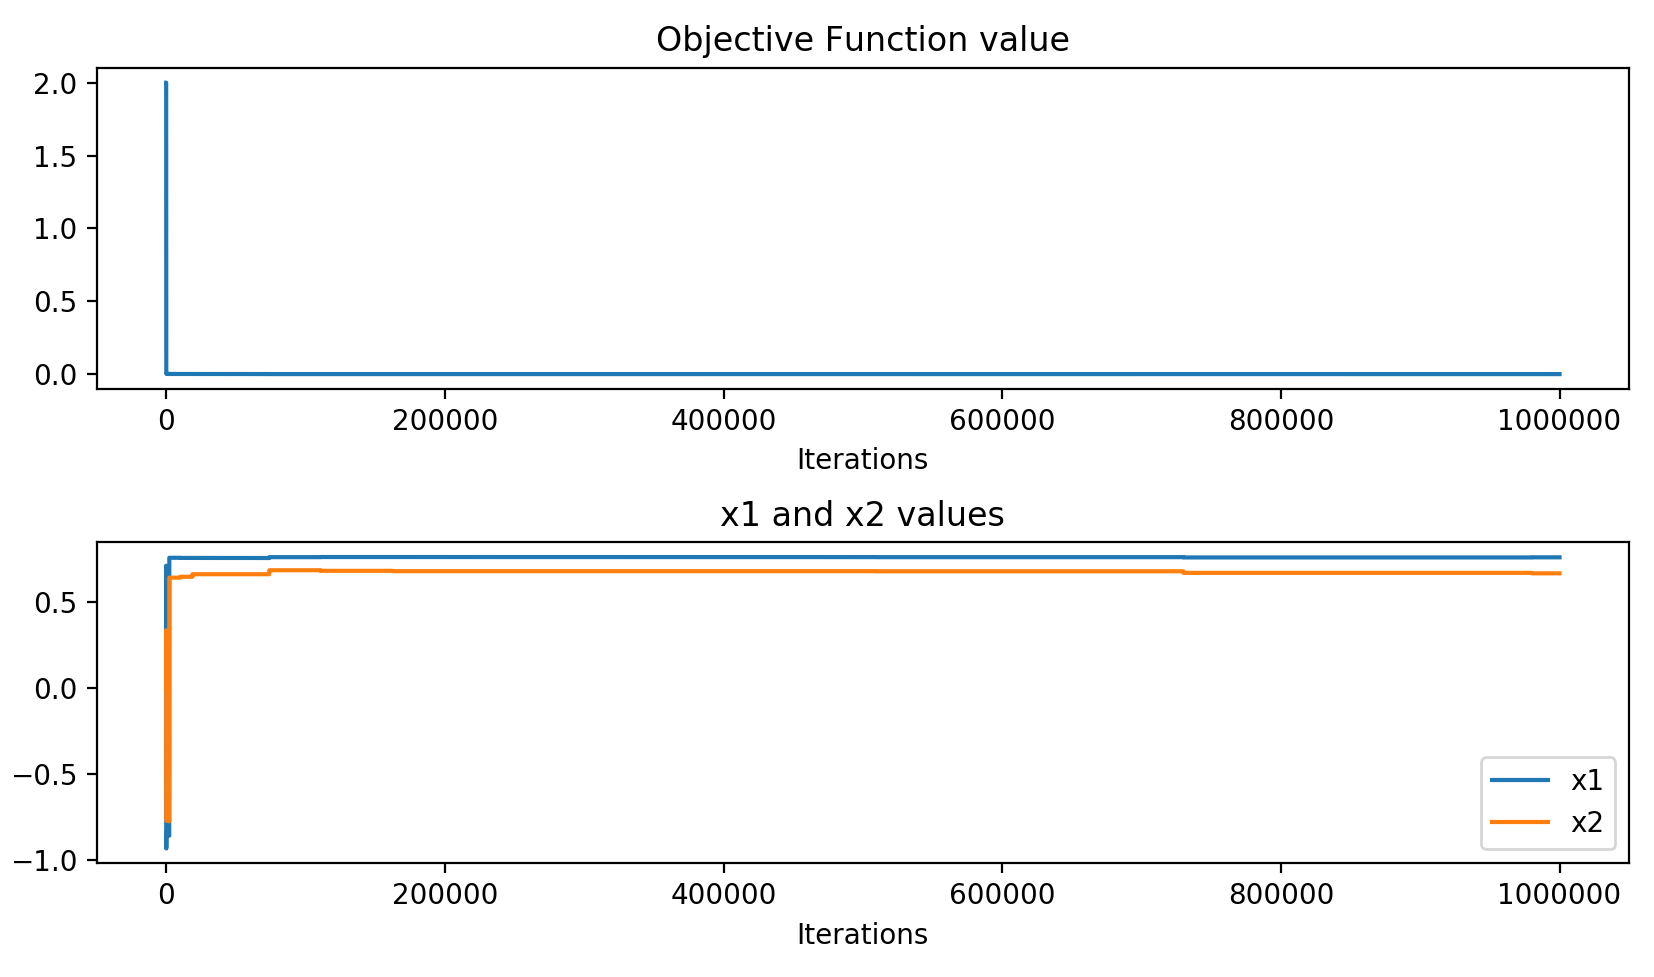

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


In [11]:
tabu_list, *_ = tabu_search(tabu_size=1000, maxit=10 ** 6, decimal=4, print_yes=1, plot=1, seed=118)

#### Final outcomes

With the tabu size of `1000` and random seed id=`101`, the final outcome has been: objective function value of **1.5694208672616154e-06**, with **x1=0.7634** and **x2=0.6746**. 

obj= 1.5694208672616154e-06 x1= 0.7634 x2= 0.6746


<IPython.core.display.Javascript object>


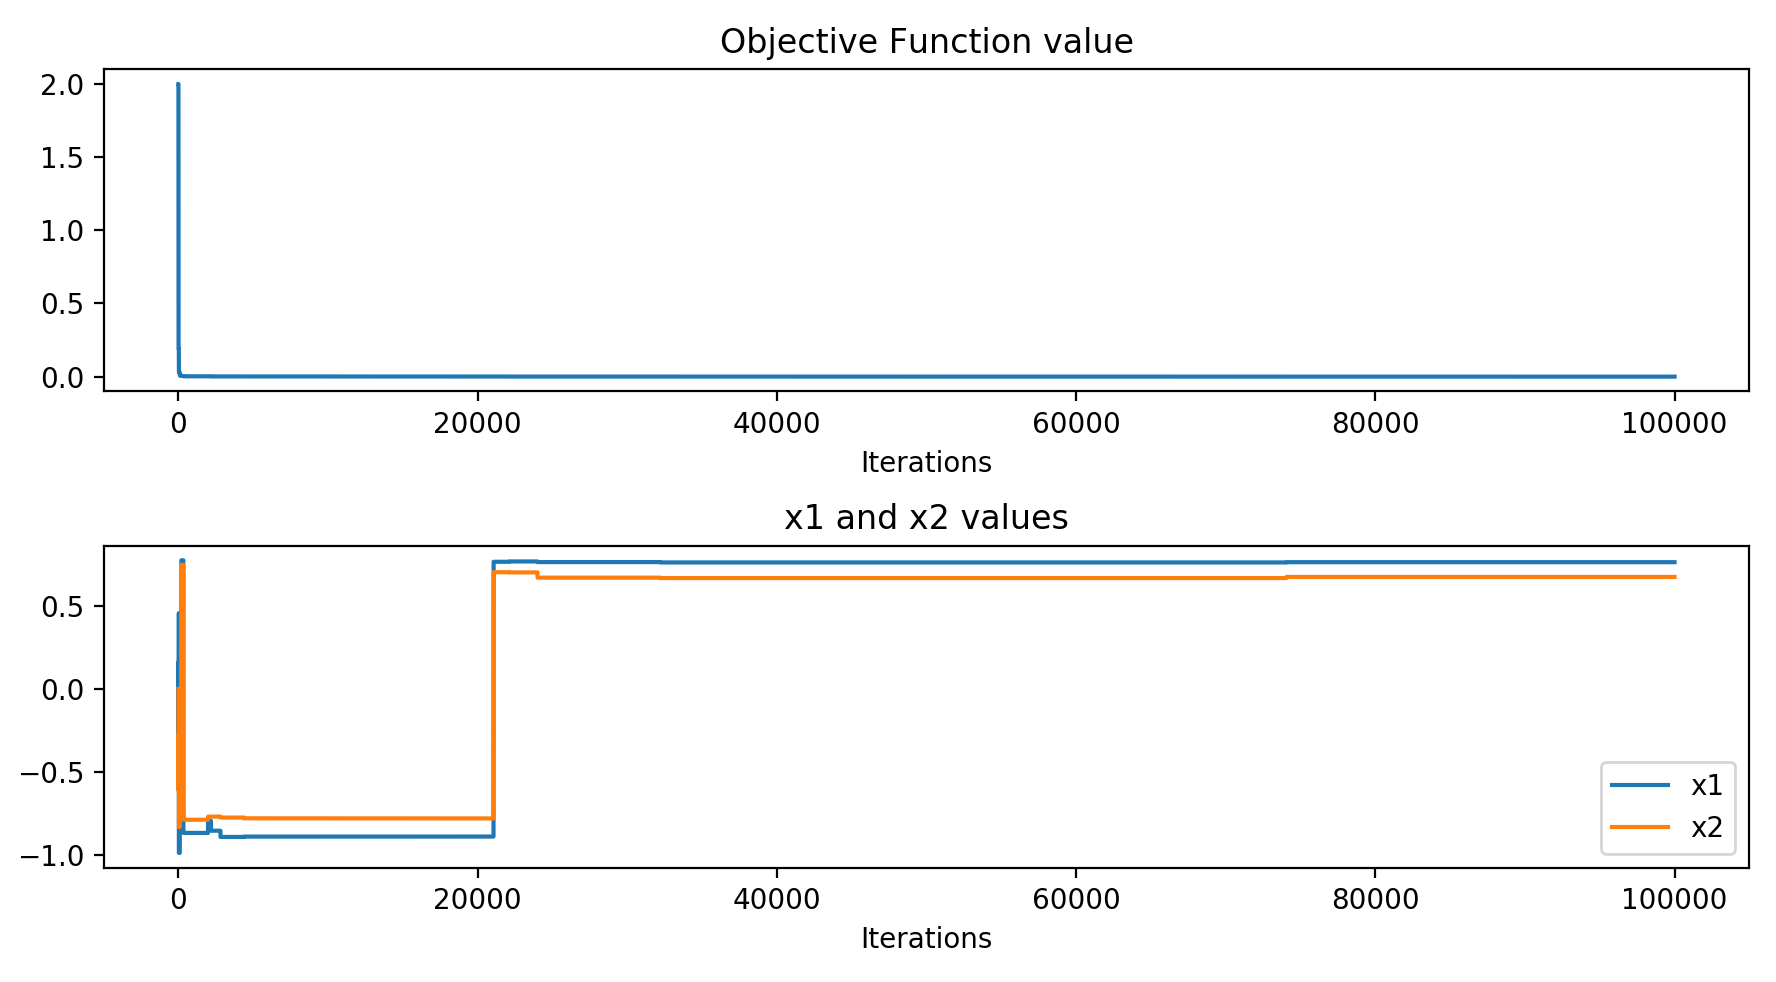

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


In [12]:
# Run algorithm with chosen parameters
tabu_list, obj_value, x1_value, x2_value, *_ = tabu_search(tabu_size=1000, maxit=10 ** 5, decimal=4,
                                                           print_yes=1, plot=1, seed=101)

The 9 neighborhood points around the solution are plotted as below. The optimal point is located at the far lower right hand corner.

<IPython.core.display.Javascript object>


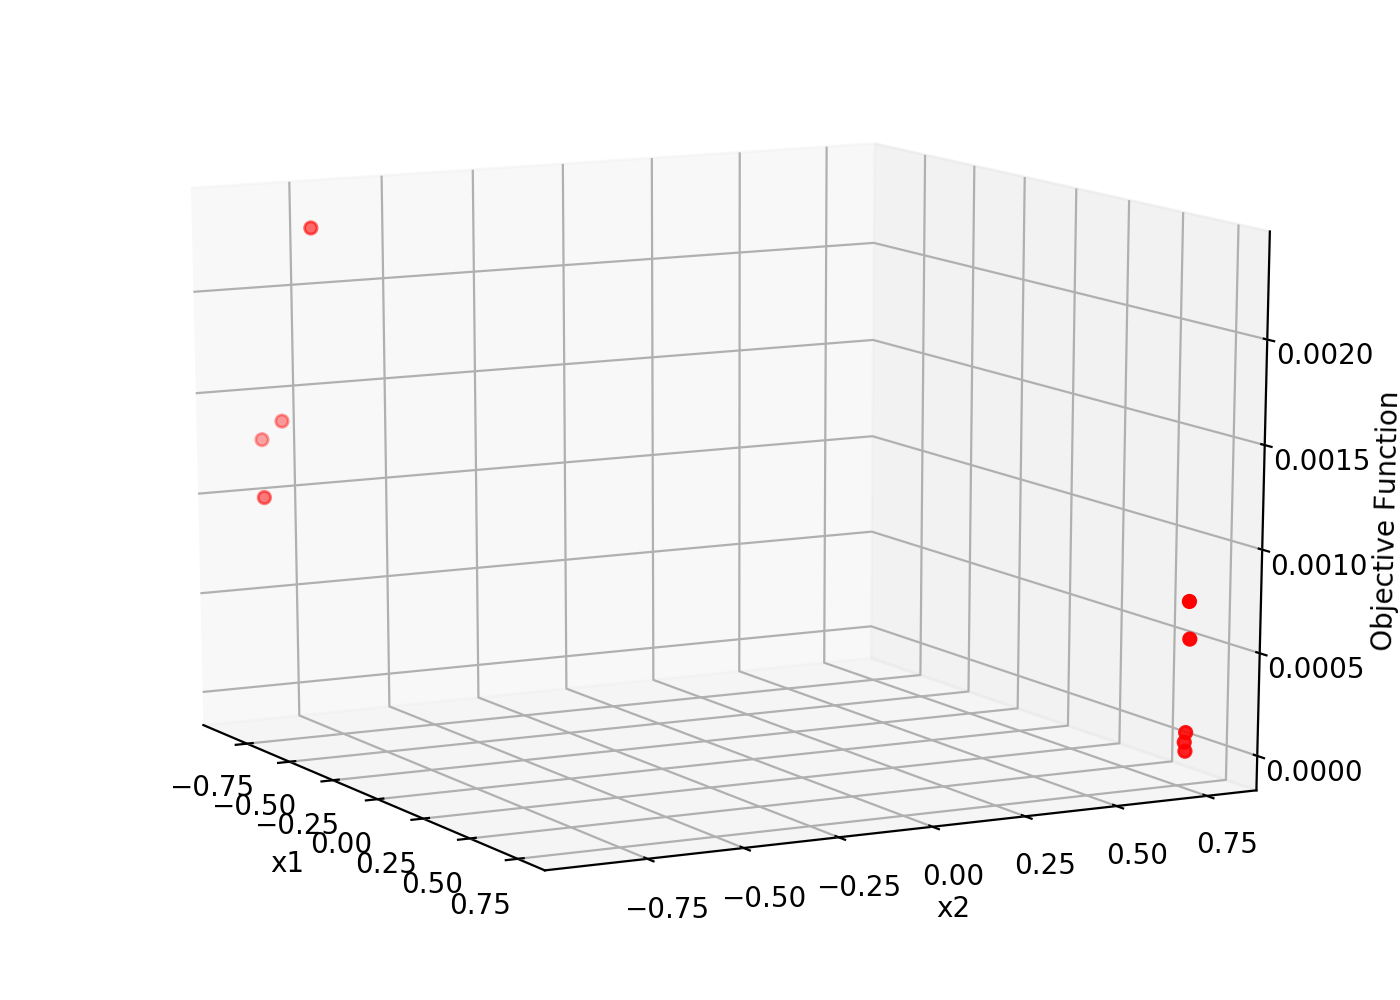

In [31]:
# %% Plot neighboring 10 points
obj_value_nodup = list(dict.fromkeys(obj_value))  # remove duplicates in obj_value list
obj_value_nodup.sort()  # sort from smallest to largest
num_smallest = 10
min10_obj = obj_value_nodup[:num_smallest]  # take the 10 smallest objective function values

x1_store = []
x2_store = []

for i in range(num_smallest):
    index = obj_value.index(min10_obj[i])
    x1_store.append(x1_value[index])  # store the x1 corresponding to the 10 minimum obj values
    x2_store.append(x2_value[index])  # store the x2 corresponding to the 10 minimum obj values

from mpl_toolkits.mplot3d import Axes3D

plt.close('all')
fig = plt.figure(figsize=(7, 5))
ax = Axes3D(fig)
x1 = np.asarray(x1_store)  # convert to numpy before plotting
x2 = np.asarray(x2_store)
surf = ax.scatter(x1, x1, obj(x1, x2), c='r', marker='o')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('Objective Function')
plt.show()

#### First 5 Iterations

The first 5 iterations are illustrated in the picture below. The tabu_size is set up as 1000 and thus won't affect the result. We can tell the objective function value after iteration 2, 3 and 4 does not change did because the three combinations of x1 and x2 does not make the solution better. 

obj= 0.1910441080717374 x1= -0.571 x2= -0.5566


<IPython.core.display.Javascript object>


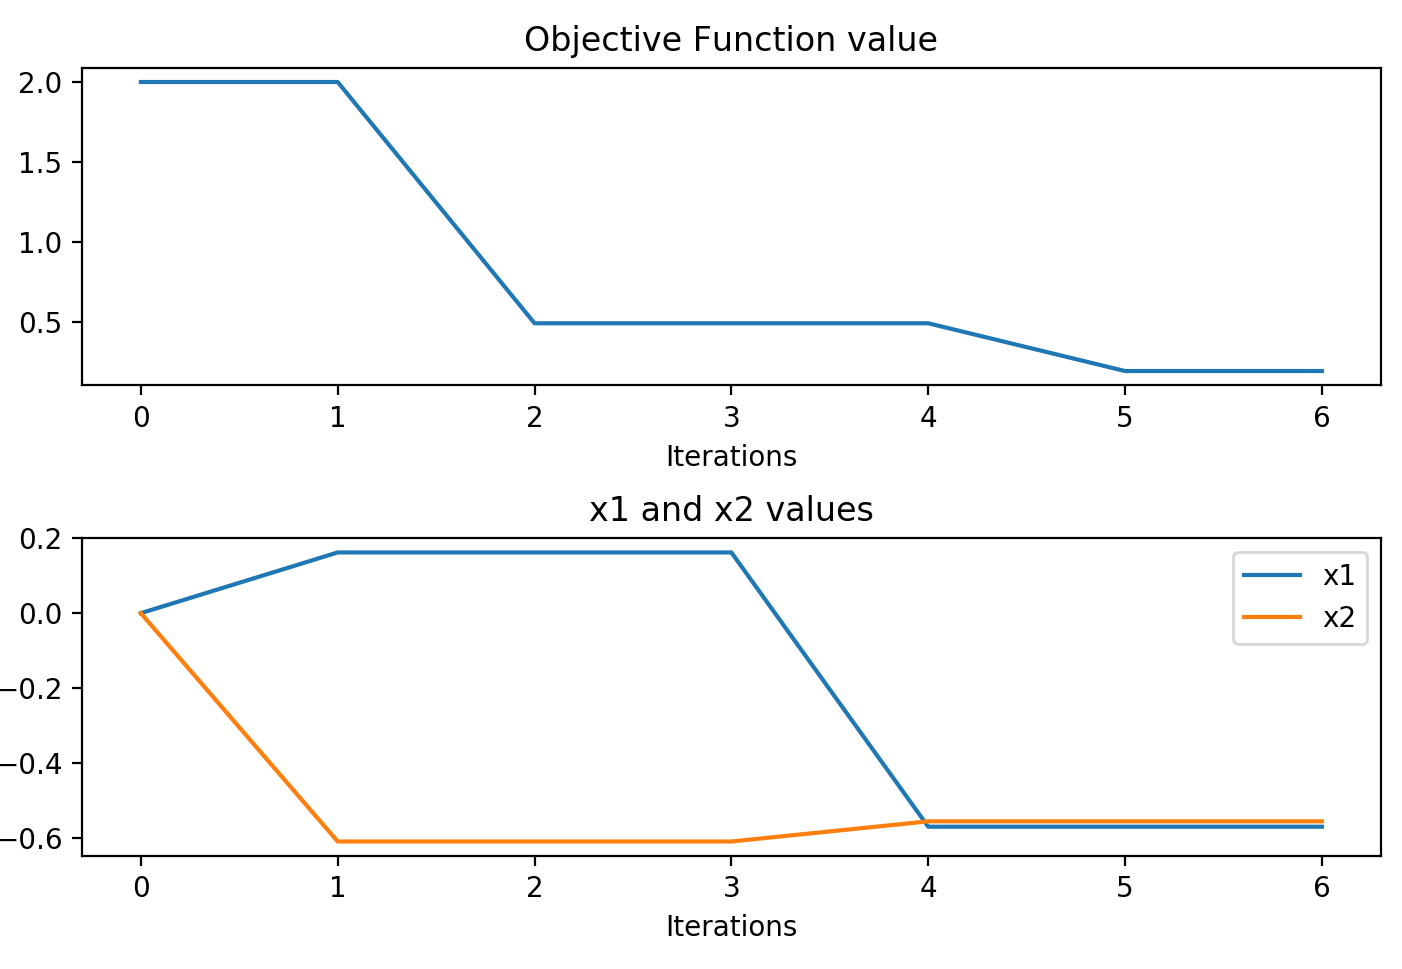

In [10]:
# The first 5 iterations
tabu_list, obj_value, x1_value, x2_value, *_ = tabu_search(tabu_size=1000, maxit=6, decimal=4,
                                                           print_yes=1, plot=1, seed=101)